# Machine Learning Project: Predicting Employee Salaries

Problem Statement:
For TechWorks Consulting to forecast newly hired employees salaries based on past performance, a machine learning model is required. 
The objective is to create a regression model with the ability to forecast income effectively based on attributes such as city, experience,
education, and prior wage.



# Approach

To solve this problem, the approach involves:

1.Data preparation involves converting and cleaning the data.

2.Understanding the data using statistical summaries and visualizations is known as exploratory data analysis, or EDA.

3.Feature engineering is the process of scaling numerical features and converting category variables.

4.Model selection involves testing various regression models and assessing each one's effectiveness.

5.Accuracy and hyperparameter tuning are two ways to improve the model.


# Data Preparation

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset Ml case study
data = pd.read_csv('C:/Users/DELL/Downloads/ML case Study.csv')
data.dropna(inplace=True)
data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [22]:
data.shape

(1589, 8)

In [23]:
data.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [24]:
data.isna().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [2]:
# Load the  second dataset colleges
data1 = pd.read_csv('C:/Users/DELL/Downloads/Colleges.csv')
data1.dropna(inplace=True)
data1.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [27]:
data1.shape

(19, 3)

In [10]:
data1.describe()

,Tier 1,Tier 2,Tier 3
count,19,19,19
unique,19,19,19
top,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
freq,1,1,1


In [17]:
data1.isna().sum()

Tier 1    0
Tier 2    0
Tier 3    0
dtype: int64

In [3]:
# Load the  third dataset cities
data2 = pd.read_csv('C:/Users/DELL/Downloads/cities.csv')
data2.dropna(inplace=True)
data2.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [32]:
data2.describe()

,Metrio City,non-metro cities
count,8,8
unique,8,8
top,Mumbai,Dehradun
freq,1,1


In [19]:
data2.isna().sum()

Metrio City         0
non-metro cities    0
dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Exploration

Convert the categorical variables in Data1 (Tier1, Tier2, Tier3) and 
Data2 (metro, non-metro) into numerical variables.

In [4]:
#Second dataset
from sklearn.preprocessing import LabelEncoder

# Dataset 2
data1 = pd.DataFrame({'College Tier': ['Tier1', 'Tier2', 'Tier3']})
le = LabelEncoder()
data1['College Tier'] = le.fit_transform(data1['College Tier'])
print(data1)


   College Tier
0             0
1             1
2             2


In [5]:
data2 = pd.DataFrame({'City': ['metro', 'non-metro']})
le = LabelEncoder()
data2['City'] = le.fit_transform(data2['City'])
print(data2)

   City
0     0
1     1


In [9]:
# Combine Dataset 1 with Dataset 2 and Dataset 3
cd = pd.concat([data, data1, data2], axis=1)
# Select only numeric columns
cd = cd.select_dtypes(include=['int64', 'float64'])

# Replace NaN values with the mean of each column
cd = cd.fillna(cd.mean())
cd['City'] = cd['City'].replace(0.5, 1.0)
cd.dropna()
cd.head(10)

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City
0,55523.0,3,66,19,71406.58,0.0,0.0
1,57081.0,1,84,18,68005.87,1.0,1.0
2,60347.0,2,52,28,76764.02,2.0,1.0
3,49010.0,2,81,33,82092.39,1.0,1.0
4,57879.0,4,74,32,73878.10,1.0,1.0
5,54340.0,4,73,31,59950.89,1.0,1.0
6,60298.0,1,42,46,66602.34,1.0,1.0
7,49944.0,2,56,37,57768.44,1.0,1.0
8,53124.0,4,40,37,70083.30,1.0,1.0
9,51141.0,1,47,60,85648.48,1.0,1.0


In [17]:
cd.shape

(1589, 7)

In [18]:
cd.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,1.000000,0.999371
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.035489,0.025086
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,1.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,1.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,2.000000,1.000000


In [19]:
cd.isna().sum()

Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College Tier           0
City                   0
dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Visualizations 

CTC (target variable): This is the column you want to predict, so it's essential to visualize its distribution and relationships with other features.

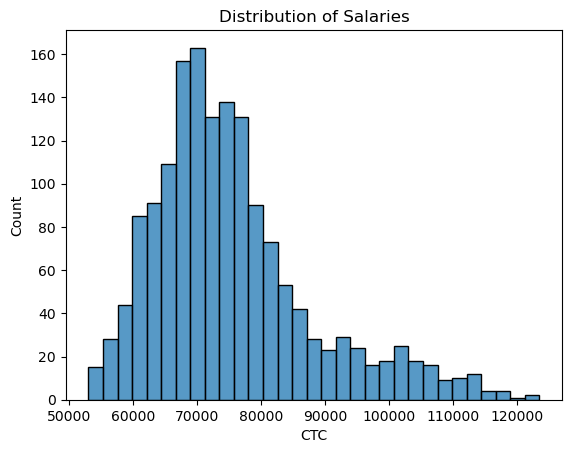

In [46]:
# Distribution of salary
sns.histplot(cd['CTC'])
plt.title('Distribution of Salaries')
plt.show()

Previous CTC: This column can help you understand the correlation between previous and current CTC.

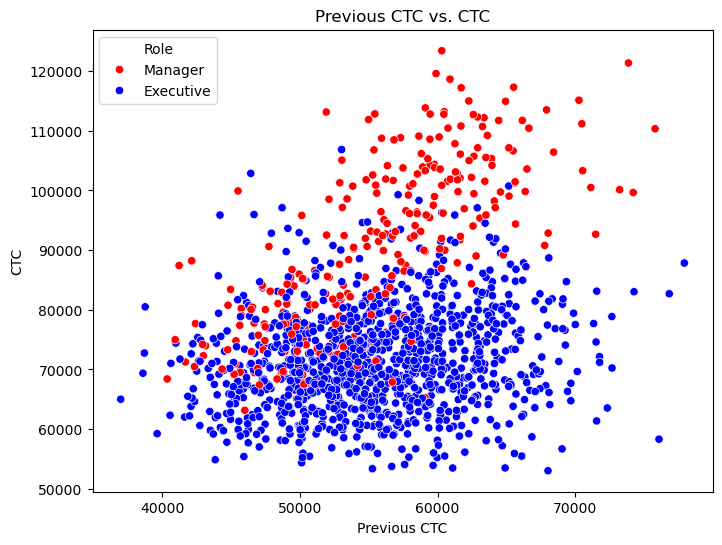

In [9]:
# Scatter plot of Previous CTC vs. CTC
plt.figure(figsize=(8,6))
sns.scatterplot(x='Previous CTC', y='CTC', data=data, hue='Role', palette=['red', 'blue'])
plt.title('Previous CTC vs. CTC')
plt.show()

Experience in Months: This column can help you understand the impact of experience on CTC.

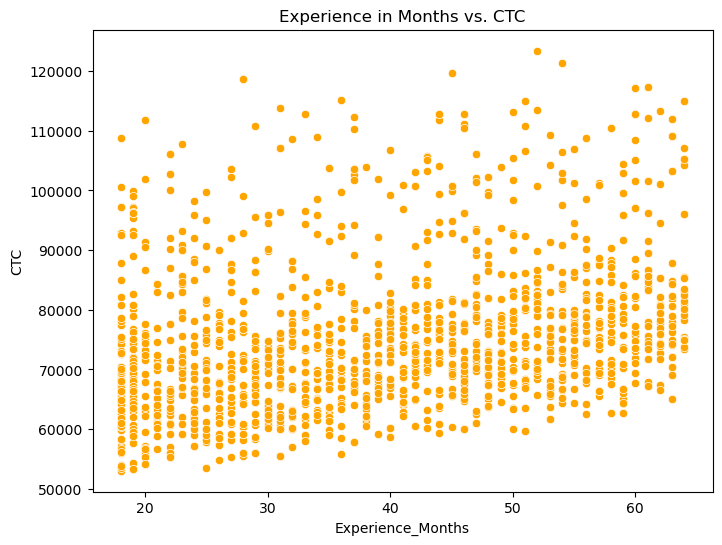

In [10]:
# Scatter plot of Experience in Months vs. CTC
plt.figure(figsize=(8,6))
cd = cd.rename(columns={'EXP (Month)': 'Experience_Months'})
sns.scatterplot(x='Experience_Months', y='CTC', data=cd,color='orange')
plt.title('Experience in Months vs. CTC')
plt.show()

Graduation marks: This column can help you understand the impact of academic performance on CTC.

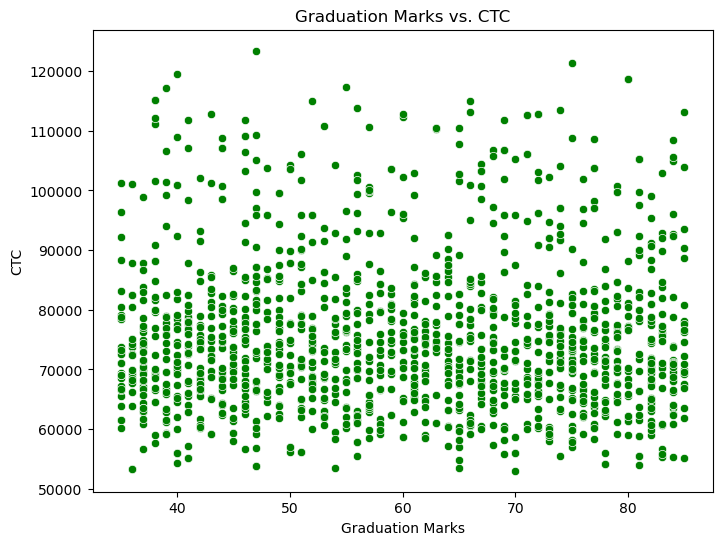

In [11]:
# Scatter plot of Graduation marks vs. CTC
plt.figure(figsize=(8,6))
sns.scatterplot(x='Graduation Marks', y='CTC', data=cd, color='green')
plt.title('Graduation Marks vs. CTC')
plt.show()

Role (Manager or Executive): This column can help you understand if there's a difference in CTC between managers and executives.

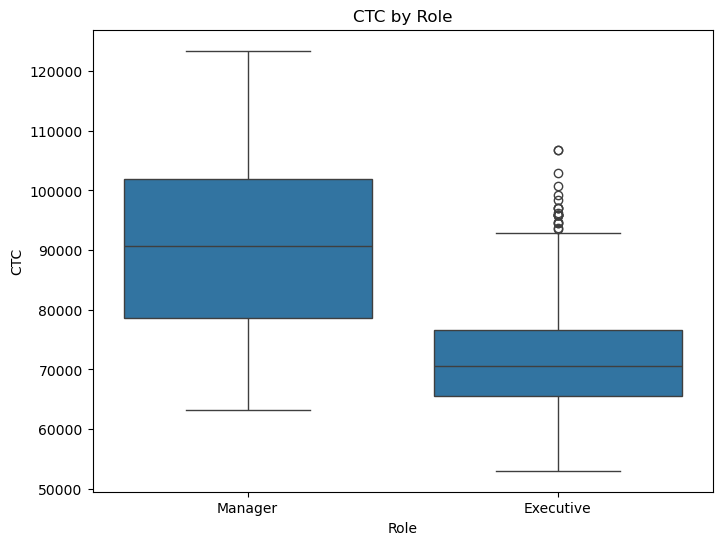

In [20]:
# Box plot of CTC by Role
plt.figure(figsize=(8,6))
sns.boxplot(x='Role', y='CTC', data=data)
plt.title('CTC by Role')
plt.show()

City (metro or non-metro): This column can help you understand if there's a difference in CTC between employees from metro and non-metro cities.

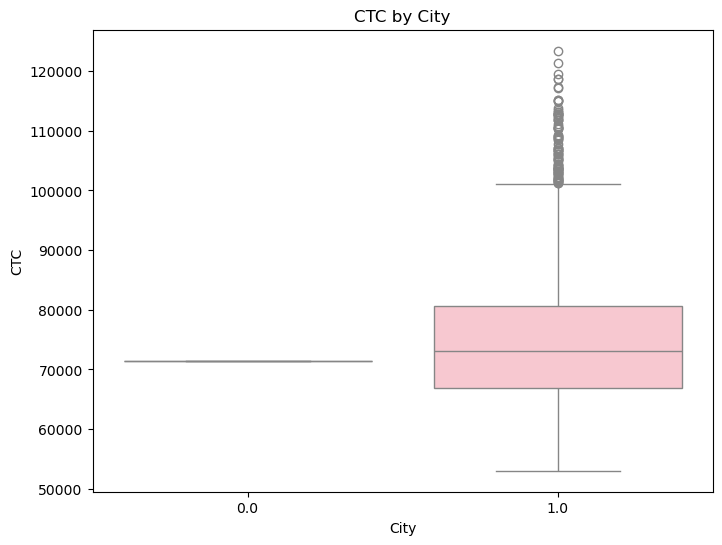

In [22]:
# Box plot of CTC by City
plt.figure(figsize=(8,6))
sns.boxplot(x='City', y='CTC', data=cd,color='pink')
plt.title('CTC by City')
plt.show()


College Tier (Tier1,Tier2 and Tier3): 

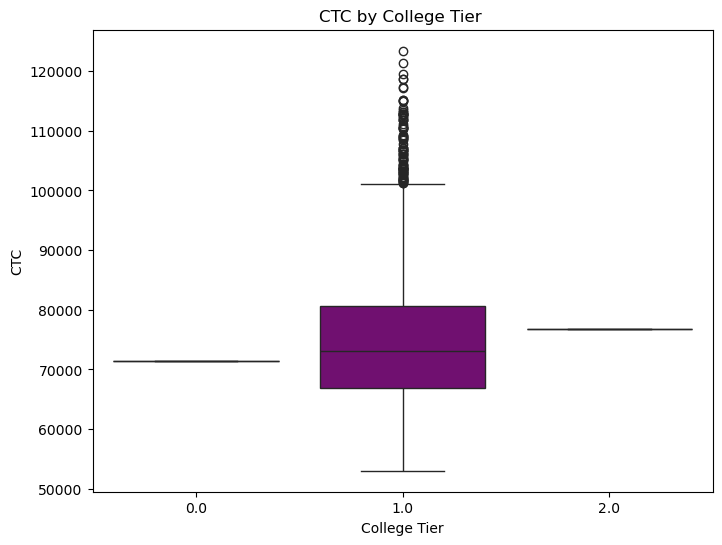

In [21]:
# Box plot of CTC by City
plt.figure(figsize=(8,6))
sns.boxplot(x='College Tier', y='CTC', data=cd,color='purple')
plt.title('CTC by College Tier ')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Model Selection

In [35]:
#Splitting Data
from sklearn.model_selection import train_test_split

X = cd.drop('CTC', axis=1)
y = cd['CTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Trying Different Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)


In [37]:
print(f"Linear Regression MSE: {lr_mse}, R2: {lr_r2}")

Linear Regression MSE: 165456831.705043, R2: 0.1302958881326458


In [38]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)


In [39]:
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")

Random Forest MSE: 148863657.57177758, R2: 0.21751592990377144


In [40]:
#Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform random hyperparameter search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Parameters: {random_search.best_params_}")

# Create the best Random Forest model
best_rf_model = random_search.best_estimator_

# Make predictions with the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the best model
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

# Print the results
print(f"Best Random Forest MSE: {best_rf_mse}, R2: {best_rf_r2}")

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Random Forest MSE: 147756676.52681074, R2: 0.2233346438042234


In [41]:
# Create a new employee DataFrame with the same columns as X_train
new_employee = pd.DataFrame({
    'College Tier': ['Tier1'],
    'City': ['Metro'],
    'Role': ['Manager'],
    'Previous CTC': [57082],
    'Previous Job Change': [1],
    'Graduation marks': [80],
    'Experience in Months': [60],
}, columns=X_train.columns)  # Use the same column names as X_train

In [42]:
# Convert categorical data
new_employee['College Tier'] = new_employee['College Tier'].map({'Tier1': 2, 'Tier2': 1, 'Tier3': 0})
new_employee['City'] = new_employee['City'].map({'Metro': 1, 'Non Metro': 0})

In [43]:
# Scale the new employee data using the same scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
new_employee_scaled = scaler.transform(new_employee)


In [44]:
# Train the model
rf_model.fit(X_train, y_train)

# Get the feature names from the training data
feature_names = X_train.columns

# Set the column names of new_employee to match the feature names
new_employee.columns = feature_names

# Now you can scale and predict without warnings
new_employee_scaled = scaler.transform(new_employee)
predicted_salary = rf_model.predict(new_employee_scaled)


In [45]:
# Predict the salary
predicted_salary = rf_model.predict(new_employee_scaled)
print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 67676.7646


-------------------------------------------------------------------------------------------------------------------------------------------------------

Model Evaluation and Selection
Evaluating Models
# Model evaluation already performed in the model selection section
Selecting the Best Model:
The Random Forest model performed better than Linear Regression, as indicated by a lower Mean Squared Error (MSE) 
and higher R-squared value. Random Forest can capture non-linear relationships and interactions between features,
which may explain its superior performance.

-------------------------------------------------------------------------------------------------------------------------------------------------------

 # Conclusion
 Answers to Questions
1. Your views about the problem statement?
   
Regression models are frequently used for tasks like salary prediction for employees, as the problem description makes obvious. 
For TechWorks Consulting to guarantee equitable and competitive remuneration, precise salary forecasting is essential.

-------------------------------------------------------------------------------------------------------------------------------------------------------                          
2.. What will be your approach to solving this task?
   
To solve this problem, the approach involves:

a..Data preparation involves converting and cleaning the data.

b..Understanding the data using statistical summaries and visualizations is known as exploratory data analysis, or EDA.

c.Feature engineering is the process of scaling numerical features and converting category variables.

d.Model selection involves testing various regression models and assessing each one's effectiveness.

e..Accuracy and hyperparameter tuning are two ways to improve the model.


------------------------------------------------------------------------------------------------------------------------------------------------------


                                                                            

3. What were the available ML model options you had to perform this task?
   
Options include Linear Regression, Random Forest Regression we can also use Gradient Boosting Machines, Support Vector Regression, etc.
Each model has its strengths depending on the data characteristics and complexity.

------------------------------------------------------------------------------------------------------------------------------------------------------                                                                            
4. Which model’s performance is best and what could be the possible reason for that?
   
Because it could handle intricate, non-linear correlations and interactions between features, the Random Forest model performed the best. 
In addition, compared to single models like linear regression, it benefits from ensemble learning, which lessens overfitting.
    

------------------------------------------------------------------------------------------------------------------------------------------------------
5. What steps can you take to improve this selected model’s performance even further?
   
To enhance performance, additional actions consist of:
- Hyperparameter Tuning: Make more thorough hyperparameter fine adjustments.
- Feature Engineering: Improve model inputs by adding additional features or by utilizing domain expertise.
- Ensemble Methods: Integrate forecasts from various models.
- Cross-validation: To make sure the model is resilient and generalizable, use cross-validation.
- Advanced Models: Investigate more complex models such as neural networks and gradient boosting.
